# Chapter 5 - Problem 6

6. We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the
Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefficients
in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the glm()
function. Do not forget to set a random seed before beginning your analysis.

In [41]:
require(ISLR)
require(boot)
set.seed(1)

Loading required package: boot


**A.** Using the summary() and glm() functions, determine the estimated
standard errors for the coefficients associated with income
and balance in a multiple logistic regression model that uses
both predictors.

In [21]:
logreg <- glm(default~balance+income,data = Default, family = "binomial") 
summary(logreg)
logreg$coef[1]


Call:
glm(formula = default ~ balance + income, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


(Intercept) 
  -11.54047

The estimated error for the **balance** coefficient is $2.274x10^{-4}$. <br>
The estimated error for the **income** coefficient is $4.985x10^{-6}$.

**B.** Write a function, boot.fn(), that takes as input the Default data set as well as an 
index of the observations, and that outputs the coefficient estimates for income and balance 
in the multiple logistic regression model.

In [39]:
boot.fn <- function(default,index){
    with(default[index,],glm(default~balance+income,family = "binomial")$coef)
}

boot.fn(Default,1:25)

(Intercept)       balance        income 
-2.556607e+01  1.639679e-17  3.198020e-19

**C.** Use the boot() function together with your boot.fn() function to estimate the standard errors 
   of the logistic regression coefficients for income and balance.


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 100)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01 -4.415747e-02 4.720873e-01
t2*  5.647103e-03  3.152386e-05 2.344576e-04
t3*  2.080898e-05 -2.958810e-07 5.476473e-06

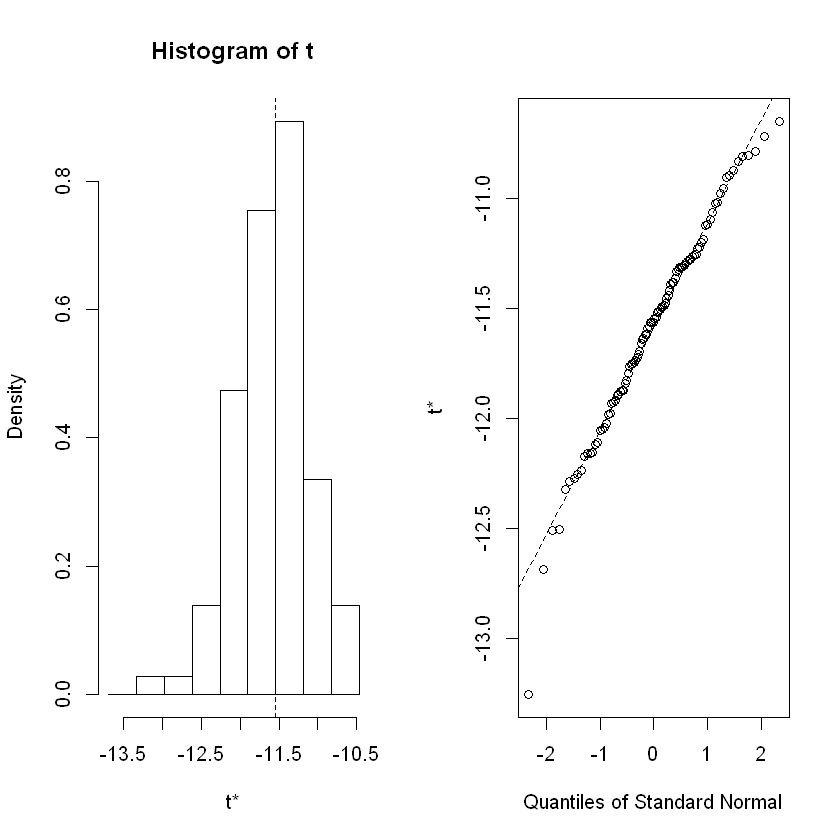

In [43]:
# Bootstrap function

boot.out <- boot(Default,boot.fn,R = 100)
boot.out # statistic for the bootstrap method. statistic, bias and standard error
plot(boot.out) # Histogram + QQplot

**D.** Comment on the estimated standard errors obtained using the
glm() function and using your bootstrap function.

The estimated standard errors using bootstrap were:
<br> **Balance**: $2.34x10^{-4}$
<br> **Income**: $5.47x10^{-6}$

These values are similar to the ones calculated from the multiple logistic regression. It confirms the power of the bootstrap method to estimate the standard errors of the coefficients.